Link to kaggle dataset: https://www.kaggle.com/andrewmvd/data-scientist-jobs from user Larxel. Downloaded on 30/06 at roughly 9:15am.

Link to Stackoverflow dataset: https://insights.stackoverflow.com/survey - downloaded 2020 survey results.


### Idea
Compare Data Scientist and Data Analyst role profiles by required skills

### Reasoning
For people at the beginning of their career in data, it can be difficult to understand the difference between data scientist and data analyst roles. What is the day to day like? How much coding will I be doing? Having recently applied for jobs again myself, I find that the definition varies a lot between companies. Some, one might even argue, advertise using the "data scientist" title because it sounds more "sexy". So what is the difference? How clear-cut is it? And what skills are needed to land a job?

A lot of what you do in a job day to day is defined by the technology you work with. The technology is also an indicator for how much code you will actually be writing and how "technical" a role is. I am therefore looking at the technology that's being used by data analysts versus data scientists to understand where the differences lie. I will be looking at two data sources: First, I will look at job descriptions to understand what skills are crucial to put on your CV to score a job in either field and how this differs. Secondly, I will have a look at the stackoverflow developer survey 2020 to understand which tools data analysts and data scientists use most and are planning to learn. 
Between these two analyses, we should be able to see the differences between Data Analyst and Data Scientist jobs. Also, we should be able to see if the reality of the jobs matches the job descriptions.

##### Questions:
* How distinctive are these roles from each other and from other roles in the field? 
    
Looking only at the roles of Data Analysts and Data Scientists, 81% of people in the field say they are only one of the two. 19% state they are both. THis looks like people working in these roles seem to distinguish them quite clearly from one another. 

However, only a small share of Data Analysts and Data Scientists does not also consider themselves as working in another role. Data Analysts declare on average more other roles than Data Scientists. Those who state they are Data Analysts (but not Data Scientists) list on average 5.1 roles, whereas those who state they are Data Scientists (but not Data Analysts) list 3.9 roles.

Data Analysts often also work as back-end Developers (57%), full-stack Developers (48%) or Database Administrators (38%). Only in 5th place with 31% comes 'Data Scientist or Machine Learning Specialist'.
Data Scientists similarly also work as back-end Developers (47%) and full-stack Developers (37%). In third place comes 'Data or business analyst' with 32%.

The biggest differences between Data Analysts and Data Scientists are for the roles Scientist and Academic Researcher (Data Scientist +12%pts) and Database Administrator, front-end Developer and desktop and enterprise applications Developer (Data Analyst +20%pts, +14%pts, +13%pts)

The data unfortunately provides no insights into which role respondents consider their "primary" role. It is therefore quite possible that many consider themselves as Data Analysts, because data analysis is part of another, *primary* role they fulfil (likely a Developer role). Data Scientist, in comparison, seems to be somewhat more of a "standalone" role.

What does this mean for aspiring Data Analysts? Will they always have to wear multiple hats and even bring developer skills to the table? Or is the stackoverflow data biased towards developers who also do data analysis and does not actually capture many "pure" Data Analysts? Based on my own recent job search, the latter seems more likely. 

> Data Analysis skills are important in many roles

> Data Scientist is a more "standalone" role, at least in the Stackoverflow/Developer world

* What tools are Data Analysts using versus what tools are Data Scientists using (Stackoverflow)?

Data Analysts are stronger on the SQL side, wherras DS use more Python (+ libraries)

* What are they each looking to start using next year (Stackoverflow)? Is either group trying to learn more about the "other group's" tools?

What they want to use in the next year largely reflects what they are already using

* Do job descriptions reflect this difference accurately? What skills are required according to job descriptions (Kaggle) and does this match what we see from Stackoverflow?

Python and R for DS, Excel, Tableau for Data Analyst. SQL required in both.

### Further analysis:
* Bring the two analyses together: Are job ads acurately reflecting what is used in the job? E.g. job ads say DS use 80 SQL, but in reality it is only 50% (this is just an example). Finding would be: Job ads suggest you will be doing more/less of this than you probably will in the end.

### Possible further improvement of existing analysis:
* Different charts
* Statistical analysis of % differences - are they significant/for which tools are they significant?


### Other questions
* Do DS or DA desire to use more new tools next year?
* Do people in smaller companies have to take on more different roles?
* Kaggle: Do requirements become more similar or more different the more senior a role gets?
* Is job satisfaction higher amongst Data Scientists?
* Do Data Analysts try to learn tools that are used more by data scientists?
* Which other roles do the DSs and DAs usually also fulfill? >> Done, could potentially make a nicer chart


# Preparations

In [56]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import networkx as nx

In [2]:
os.chdir(r"C:\Users\j\Documents\udacity-ds-nanodegree\assignment1\data")

In [3]:
pd.set_option("display.max_columns", None)

## Reading in data

In [4]:
dfk = pd.read_csv(
    r"C:\Users\j\Documents\udacity-ds-nanodegree\assignment1\data\kaggle_ds_jobs\DataScientist.csv")

In [5]:
dfs = pd.read_csv(r"stackoverflow_survey\survey_results_public.csv")

# Part 1 - The Kaggle Job Data

## Inspecting data

In [6]:
dfk.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [ ]:
# Checking for base size
dfk.shape

In [ ]:
# Checking for missing data
dfk.info()

## Defining functions

## Creating comprehensive list of tools

Sources: 
* Tools listed in Stackoverflow survey
* Top BI, statistical software & data visualisation tools as found online: (Note: There is a plethora of tools out there. After some research I came up with the list below which contains, to my knowledge, all currently highly popular tools plus some more I am myself unfamiliar with. In the analysis, any tools that have low incidence will be removed)
    * https://www.datapine.com/articles/best-bi-tools-software-review-list
     * Datapine
     * SAS
     * Clear Analytics
     * SAP
     * Domo
     * Metric Insights
     * Zoho Analytics
     * Microstrategy
     * Gooddata
     * Cognos Analytics (by IBM)
     * QlikView
     * Yellowfin
    * https://towardsdatascience.com/top-5-bi-tools-that-you-must-use-for-data-visualization-7ccc2a852bd3
     * Qlik Sense
     * Tableau
     * Power BI (by Microsoft)
     * SAP Hana
    * https://www.cio.com/article/3322749/top-business-intelligence-bi-tools.html
     * Board (remove as potentially confusing word)
     * Dundas BI
     * MicroStrategy
     * Oracly Analytics Cloud
     * Sisense
     * Tibco
    * https://www.forbes.com/sites/bernardmarr/2020/05/22/the-9-best-analytics-tools-for-data-visualization-available-today/?sh=36ebb06a4743
     * Infogram
     * Google Charts
     * Paraview
     * Looker
    * https://uk.pcmag.com/cloud-services/83744/the-best-data-visualization-tools-for-2020
     * Google Analytics
    * https://mopinion.com/business-intelligence-bi-tools-overview/
     * Oracle BI
    * https://www.trustradius.com/business-intelligence-bi
     * SAP Analytics Cloud
    * Selection of https://www.capterra.com/statistical-analysis-software/
     * SPSS
     * Stata
     * Minitab
     * Matlab
     * Alteryx
     * Google DataStudio
* Excel
* Adding other names of tools in list, e.g. abbreviations of names (e.g. GCP = Google Cloud Platform)

In [ ]:
online_research_list = ['Datapine',
                   'SAS',
                   'Clear Analytics', 
                   'SAP', 
                   'Domo', 
                   'Metric Insights', 
                   'Zoho Analytics',
                   'Microstrategy',
                   'GoodData',
                   'Cognos Analytics',
                  'QlikView',
                  'Yellowfin',
                  'Qlik Sense',
                  'Tableau',
                  'Power BI',
                  'SAP Hana',
                  'Dundas BI',
                  'MicroStrategy',
                  'Oracle Analytics Cloud',
                  'Sisense',
                  'Tibco',
                  'Infrogram',
                  'Google Charts',
                  'Paraview',
                  'Looker',
                  'Google Analytics',
                  'Oracle BI',
                  'SAP Analytics Cloud',
                  'SPSS',
                  'Stata',
                  'Minitab',
                  'Matlab',
                  'Alteryx',
                  'Data Studio']

In [ ]:
# Retrieving all DevTypes from the Stackoverflow data
all_tools = subset_creator(dfs_tools, column_list)

In [ ]:
# Compiling a comprehensive list without duplicates, sorted
full_list = all_tools + online_research_list + ['Excel', 'MS Office'] + ['Workplace','Azure','Bash','Shell','PowerShell','IBM Cloud','IBM Watson','Google Suite','Slack','SQL Server','GCP','Torch','PyTorch','Amazon Web Services','Visual Basic', 'PowerBI']
full_list = list(set(full_list))
full_list = sorted(full_list, key=lambda x: x.upper())

## Filtering

**Sensible Filters**

**Job Title**: Only job titles that contain the key descriptions: Data Analyst, Business Intelligence Analyst, Business Analyst, Data Scientist, Machine Learning Specialist

In [ ]:
# Reducing the dataset to jobs that contain "Data Scientist" or "Data Analyst"
dfk_f = dfk.loc[dfk['Job Title'].str.contains(r'Data Analyst|Business Intelligence Analyst|Business Analyst|Data Scientist|Machine Learning Specialist')]

In [ ]:
# Checking new base size
dfk_f.shape

## Marking job postings as Data Analyst or Data Scientist postings

In [ ]:
# Adding binary identifiers for Data Analyst and Data Scientist
dfk_f['Data or business Analyst']=0
dfk_f.loc[dfk_f['Job Title'].str.contains(r'Data Analyst|Business Intelligence Analyst|Business Analyst'),'Data or business Analyst'] = 1

dfk_f['Data scientist or machine learning specialist']=0
dfk_f.loc[dfk_f['Job Title'].str.contains(r'Data Scientist|Machine Learning Specialist'),'Data scientist or machine learning specialist'] = 1

In [ ]:
# Checking if there is overlap
dfk_f['Both job titles'] = dfk_f['Data or business Analyst'] + dfk_f['Data scientist or machine learning specialist']
dfk_f['Both job titles'].value_counts()

In [ ]:
# Removing ambiguous job titles (losing 3 rows >> minimal loss)
dfk_f = dfk_f.loc[dfk_f['Both job titles']==1]

In [ ]:
# Creating column that identifies DA and DS jobs
dfk_f['Job Title Reduced']='no information'
dfk_f.loc[dfk_f['Data or business Analyst']==1,'Job Title Reduced']='DA'
dfk_f.loc[dfk_f['Data scientist or machine learning specialist']==1,'Job Title Reduced']='DS'

In [ ]:
# Checking base size for each group
dfk_f['Job Title Reduced'].value_counts()

In [ ]:
# Storing abse sizes for further analysis
n_da_k = dfk_f.loc[dfk_f['Job Title Reduced']=='DA']['index'].count()
n_ds_k = dfk_f.loc[dfk_f['Job Title Reduced']=='DS']['index'].count()

In [ ]:
print("Base size DA: ",n_da_k)
print("Base size DS: ",n_ds_k)

## Creating columns for tech/tools (0/1 coded)

In [ ]:
dfk_f

In [ ]:
# Creating one column per tool
dfk_f[full_list] = np.nan

In [ ]:
# Adding 1 for tool if mentioned in job description
# Test your regex: https://regexr.com/
for i in full_list:
    r1 = r"[\s.,;:/(]"
    r2 = r"[\s.,;:/)]"
    regex_string = re.compile(r1 + re.escape(i) + r2, re.IGNORECASE)
    dfk_f.loc[dfk_f['Job Description'].str.contains(regex_string),i] = 1

In [ ]:
dfk_f = dfk_f.fillna(0)

In [ ]:
dfk_f

## Question 1.1: Do tool/tech requirements differ for Data Analysts and Data Scientists?

In [ ]:
dfk_cooc1 = dfk_f.groupby('Job Title Reduced')[full_list].sum().transpose()

In [ ]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfk_cooc1['DA_share']=dfk_cooc1['DA']/n_da_k
dfk_cooc1['DS_share']=dfk_cooc1['DS']/n_ds_k

In [ ]:
# Adding a difference column
dfk_cooc1['Difference'] = dfk_cooc1['DA_share'] - dfk_cooc1['DS_share']

# Removing tools with low base sizes
min_bs = 50 # adjust as desired
dfk_cooc1 = dfk_cooc1.loc[(dfk_cooc1['DA'] > min_bs) | (dfk_cooc1['DS'] > min_bs)]

# Removing tools with low endorsement >> ISN'T THIS EFFECTIVELY DOING THE SAME AS THE BASESIZE?
min_end = 0.1 # adjust as desired
dfk_cooc1 = dfk_cooc1.loc[(dfk_cooc1['DA'] > min_end) | (dfk_cooc1['DS'] > min_end)]


In [ ]:
plt.rcParams["figure.figsize"] = [10, 15]
dfk_cooc1[['DA_share','DS_share', 'Difference']].sort_values(by=['Difference']).plot.barh();

# Part 2 - The Stackoverflow Data

## Inspecting data

In [7]:
dfs.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [11]:
print("The original base size is",dfs.shape[0])
print("The number of columns is",dfs.shape[1])

The original base size is 64461
The number of columns is 61


In [14]:
# Inspecting data types and missing values
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

## Defining functions

In [15]:
def subset_creator(df, column_list):
    '''
    INPUT:
    df: full dataframe
    column_list: list of columns from which unique string values need to e extracted

    OUTPUT:
    super_list2: list that contains each unqiue value from the columns in column_list once

    What the function does:
    The functions takes in columns which contain string values, 
    where each row multiple can contained multiple values separated by a delimiter (e.g. 'dog;cat;rabbit').
    The function extracts all unique strings values from all columns from column_list and returns them in super_list2.
    Each value is only contained once in super_list2.
    '''
    df = df.fillna('No information')
    super_list = []
    for i in column_list:
        nested_list = list(df[i].str.split(';'))
        flat_list = [item for sublist in nested_list for item in sublist]
        all_set = set(flat_list)
        all_list = list(all_set)
        super_list.append(all_list)
    super_list = [item for sublist in super_list for item in sublist]
    super_list_all_set = set(super_list)
    super_list_all_list = list(super_list_all_set)
    super_list2 = [i for i in super_list_all_list if i != 'No information']
    return super_list2

In [16]:
def grouping_formatting(df, column):
    '''
    INPUT:
    df: df to be reformatted
    column: To set column name

    Output:
    Reformatted dataframe

    What this function does:
    This function reformats the dataframe after running groupby. It is used inside the grouping function.
    '''
    df = df.reset_index()
    df = df.drop(columns=[0], axis=1)
    df = df.rename(columns={"index": "Categories", 1: column})
    return df

In [17]:
def grouping(df, all_items, column, bs):
    '''
    INPUT:
    df: dataframe with all data
    all_devtypes: list of all different Developer roles
    column: binary coded column
    bs: True/False value deciding whether to include base sizes

    OUTPUT:
    df_cooc: grouped by df that is transposed and contains column % based on total and - if wanted - base sizes

    What this function does:
    1. Save the base size n for DevType of interest
    2. Create new df by running groupby, immediately followed by transposing and dividing counts by n
    3. Tidying up the new df using grouping_formatting function
    4. Adding in base size if requested
    '''
    n = df[column].sum()
    df_cooc = df.groupby([column])[all_items].sum().transpose()/n
    df_cooc = grouping_formatting(df_cooc, column)
    if bs:
        df_bs = df.groupby([column])[all_items].sum().transpose()
        df_bs = grouping_formatting(df_bs, column)
        # changing column names to indicate it is base size
        bs_columns = list(df_bs.columns)
        bs_columns.remove("Categories")
        for i in bs_columns:
            df_bs = df_bs.rename(columns={i: i+"_bs"})
        # merging
        df_cooc = pd.merge(
            df_cooc, df_bs, left_on='Categories', right_on='Categories')
    return df_cooc

In [18]:
'''
I have a problem here, because Microsoft Azure was in the survey TWICE. So Pandas labels them _x and _y. I need to 
prevent this duplication >>> It works now, but is not unversally applicable at all!

This function creates dummy variables for my various categorical columns. 
It is also used further up in the code already for the DevType variable. 
Once it is de-bugged, move it up to your functions'''


def dummies(df, column_list):
    for i in column_list:
        df_interim = df[i].str.get_dummies(sep=';')
        df = pd.merge(df, df_interim, left_index=True, right_index=True)
    ''' 
    At this stage I should somehow remove the duplicated columns
    CHECK THIS OUT : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html
    '''
    header_list = df.columns
    # identify all duplicate cases >> WOULD BE BETTER WITH REGEX _\D$
    issue_list = [i for i in header_list if i.endswith(
        '_x') or i.endswith('_y')]
    df['Microsoft Azure'] = df[issue_list[0]] + \
        df[issue_list[1]]  # NEED TO AUTOMATE THE "AZURE"
    df = df.drop(columns=[issue_list[0], issue_list[1]], axis=1)
    return df, issue_list

## Filtering  (includes creating dummy variables for DevTypes)

**Sensible filters**

**MainBranch**: Developers by profession; code sometimes as part of their work

**Employment**: Employed full-time; employed part-time; independent contractor, freelancer or self-employed

**DevType**: Not NA >> This is used for grouping sample into Data Analysts and Data Scientists, hence cannot work with null values

**DevType**: Data or business analyst; Data scientist or machine learning specialist >> This is my desired sample

In [19]:
# Filerting on MainBranch
dfs=dfs.loc[(dfs['MainBranch']=="I am a developer by profession")|(dfs['MainBranch']=="I am not primarily a developer, but I write code sometimes as part of my work")]

In [20]:
# Filtering on Employment status
dfs=dfs.loc[(dfs['Employment']=="Employed full-time")|(dfs['Employment']=="Employed part-time")|(dfs['Employment']=="Independent contractor, freelancer, or self-employed")]

In [21]:
# Filerting on DevType = NaN
dfs=dfs.dropna(subset=['DevType'])

In [22]:
# Need to create columns for two professions I am interested in
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_d1 = dfs['DevType'].str.get_dummies(sep=';')

In [23]:
# Merging the dummy dataframe onto the original dataframe
dfs = pd.merge(dfs, dfs_d1, left_index=True, right_index=True)

In [24]:
# Filtering on respondents that work as Data Scientist or Data Analyst
dfs = dfs.loc[(dfs['Data or business analyst']==1)|(dfs['Data scientist or machine learning specialist']==1)]

In [26]:
# Checking new base size
print("The new base size after filtering is",dfs.shape[0])

The new base size after filtering is 5952


## Question 2.1: How distinctive are the Data Analyst and the Data Scientist roles from each other?

How many % of people are Data Analysts, how many Data Scientists and how many are both?

In [27]:
dfs['Data or business analyst'].mean()

0.5942540322580645

In [28]:
dfs['Data scientist or machine learning specialist'].mean()

0.5929099462365591

In [29]:
dfs['DA and DS']=0
dfs.loc[(dfs['Data or business analyst']==1) & (dfs['Data scientist or machine learning specialist']==1),'DA and DS']=1
dfs['DA and DS'].mean()

0.18716397849462366

Creating a variable to identify DAs, DSs and those who are both DA and DS >> Needed for further analysis

In [30]:
dfs['DevType_RoleDescription']=np.nan
dfs.loc[dfs['DA and DS']==1,'DevType_RoleDescription']='DA and DS'
dfs.loc[(dfs['DA and DS']==0) & (dfs['Data scientist or machine learning specialist']==1),'DevType_RoleDescription']='DS only'
dfs.loc[(dfs['DA and DS']==0) & (dfs['Data or business analyst']==1),'DevType_RoleDescription']='DA only'

#### Creating base sizes for further analysis
Get base size for each of the three groups (DA only, DS only, DA and DS)

In [31]:
n_da_only = dfs.loc[dfs['DevType_RoleDescription']=='DA only']['Respondent'].count()
n_ds_only = dfs.loc[dfs['DevType_RoleDescription']=='DS only']['Respondent'].count()
n_da_and_ds = dfs.loc[dfs['DevType_RoleDescription']=='DA and DS']['Respondent'].count()

In [32]:
print("Base size DA only: ",n_da_only)
print("Base size DS only: ",n_ds_only)
print("Base size DA and DS: ",n_da_and_ds)

Base size DA only:  2423
Base size DS only:  2415
Base size DA and DS:  1114


Get base size for two groups (DS, DA >> They have a certain overlap)

In [33]:
n_da = dfs['Data or business analyst'].sum()
n_ds = dfs['Data scientist or machine learning specialist'].sum()

In [34]:
print("Base size DA: ",n_da)
print("Base size DS: ",n_ds)

Base size DA:  3537
Base size DS:  3529


### How distinctive are the DA and DS role from other roles in the field?

In [35]:
# Retrieving all DevTypes from the Stackoverflow data
all_devtypes = subset_creator(dfs, ['DevType'])

##### How many respondents claim to ONLY be a Data Analyst or a Data Scientist?

In [36]:
# Create column that shows number of roles chosen
dfs['NumberOfRoles']=dfs[all_devtypes].sum(axis=1)

In [37]:
pd.crosstab(dfs['NumberOfRoles'],dfs['DevType_RoleDescription'])

DevType_RoleDescription,DA and DS,DA only,DS only
NumberOfRoles,,,
1,0,225,325
2,164,313,476
3,174,344,495
4,151,292,395
5,124,315,248
6,98,246,147
7,85,203,118
8,56,136,59
9,52,120,47


##### How many roles do respondents say they fill on average?

In [38]:
dfs.groupby('DevType_RoleDescription')['NumberOfRoles'].mean()


DevType_RoleDescription
DA and DS    6.427289
DA only      5.118035
DS only      3.892754
Name: NumberOfRoles, dtype: float64

##### What else do they claim to be?

Analysis for 3-way split (DA only, DS only, DA and DS)

Link to article about co-occurence: https://tm4ss.github.io/docs/Tutorial_5_Co-occurrence.html

In [39]:
# Creating a co-occurence table
dfs_cooc1 = dfs.groupby('DevType_RoleDescription')[all_devtypes].sum().transpose()

In [40]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc1['DA_share']=dfs_cooc1['DA only']/n_da_only
dfs_cooc1['DA and DS_share']=dfs_cooc1['DA and DS']/n_da_and_ds
dfs_cooc1['DS_share']=dfs_cooc1['DS only']/n_ds_only

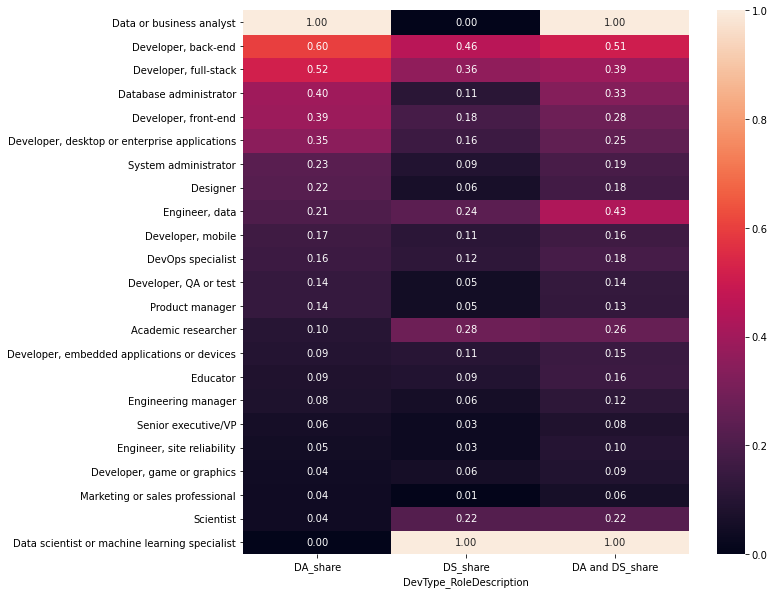

In [41]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,10))
ax=sns.heatmap(dfs_cooc1[['DA_share','DS_share','DA and DS_share']].sort_values(by=['DA_share']), annot=True, fmt='.2f')
ax.set_ylim(0,23);

Analysis for 2-way split with partial overlap (DA, DS)

In [42]:
# Creating a co-occurence table
dfs_cooc2_da = grouping(dfs, all_devtypes, 'Data or business analyst', False)
dfs_cooc2_ds = grouping(dfs, all_devtypes, 'Data scientist or machine learning specialist', False)
dfs_cooc2 = pd.merge(dfs_cooc2_da, 
        dfs_cooc2_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc2 = dfs_cooc2.set_index('Categories')

# Adding a Difference column
dfs_cooc2['Difference'] = dfs_cooc2['Data scientist or machine learning specialist'] - dfs_cooc2['Data or business analyst']

In [ ]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,10))
ax=sns.heatmap(dfs_cooc2.sort_values(by=['Difference']), annot=True, fmt='.2f')
ax.set_ylim(0,23);

In [ ]:
# Creating horizontal bar chart to show differences
plt.rcParams["figure.figsize"] = [10, 10]
dfs_cooc2[['Data or business analyst','Data scientist or machine learning specialist','Difference']].sort_values(by=['Difference']).plot.barh();

## Creating a co-occurence network graph for all roles

In [43]:
df_ng = dfs[all_devtypes]

In [44]:
# https://stackoverflow.com/questions/20574257/constructing-a-co-occurrence-matrix-in-python-pandas
df_ngt = df_ng.T.dot(df_ng)

In [45]:
np.fill_diagonal(df_ngt.values, 0)

Video about Networkx: https://www.youtube.com/watch?v=flwcAf1_1RU

Create an edge list from the cooccurence matrix: https://stackoverflow.com/questions/57456069/how-to-convert-a-co-occurrence-matrix-to-networkx-graph

In [49]:
df_ngt.values[np.tril(np.ones(df_ngt.shape)).astype(bool)] = 0

In [52]:
df_ngt_stacked = df_ngt.stack()

In [54]:
df_ngt_stacked = df_ngt_stacked[df_ngt_stacked >= 1].rename_axis(('node1', 'node2')).reset_index(name='weight')

In [55]:
df_ngt_stacked

,node1,node2,weight
0,Product manager,"Developer, embedded applications or devices",136
1,Product manager,Designer,232
2,Product manager,Data or business analyst,495
3,Product manager,"Engineer, site reliability",93
4,Product manager,Database administrator,310
...,...,...,...
248,"Engineer, data",DevOps specialist,358
249,"Engineer, data",Marketing or sales professional,75
250,Scientist,DevOps specialist,134
251,Scientist,Marketing or sales professional,52


In [71]:
# Filtering only on connections with weight > 10
df_ngt_stacked_f = df_ngt_stacked.loc[df_ngt_stacked['weight']>300]

In [72]:
G = nx.from_pandas_edgelist(df_ngt_stacked_f, 
                            source='node1', 
                            target='node2', 
                            edge_attr='weight')
print("No of unique characters:", len(G.nodes))
print("No of connections:", len(G.edges))

No of unique characters: 19
No of connections: 100


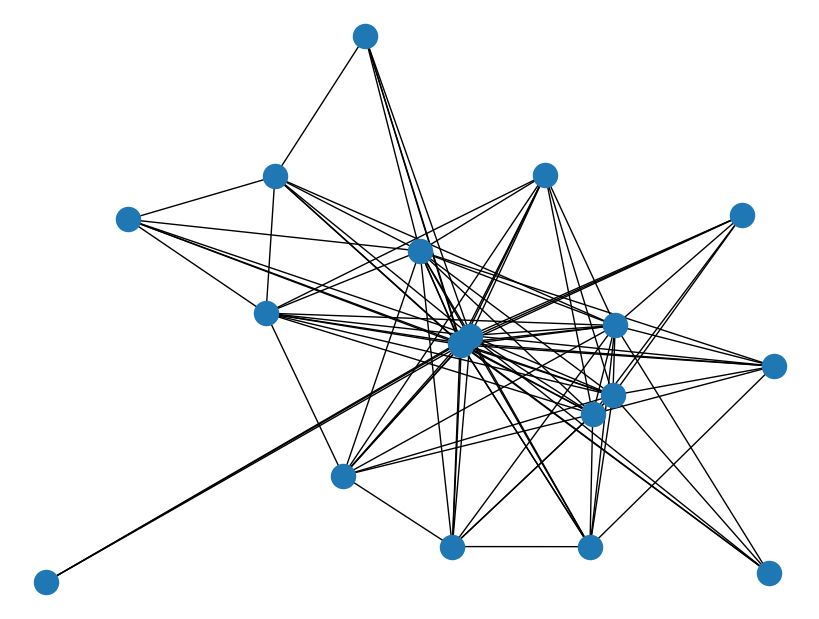

In [76]:
# all graph options
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_shell, nx.draw_spring]

# plot graph option
selected_graph_option = 0

# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

## Question 2.2: Do tools used by Data Analysts versus Data Scientists differ?

In [ ]:
# Listing all columns that refer to tech and tools variables
column_list = ['MiscTechWorkedWith',
               'LanguageWorkedWith',
               'NEWCollabToolsWorkedWith',
               'DatabaseWorkedWith',
               'PlatformWorkedWith',
               'WebframeWorkedWith']

In [ ]:
# Creating columns in df for all tools
# https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas
dfs_tools, issue_list = dummies(dfs, column_list)

In [ ]:
# Creating list with all tools
all_tools = subset_creator(dfs_tools, column_list)

Analysis for 3-way split (DA only, DS only, DA and DS)

In [ ]:
# Creating a co-occurence table
dfs_cooc3 = dfs_tools.groupby('DevType_RoleDescription')[all_tools].sum().transpose()

In [ ]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc3['DA_share']=dfs_cooc3['DA only']/n_da_only
dfs_cooc3['DA and DS_share']=dfs_cooc3['DA and DS']/n_da_and_ds
dfs_cooc3['DS_share']=dfs_cooc3['DS only']/n_ds_only

In [ ]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,40))
ax=sns.heatmap(dfs_cooc3[['DA_share','DS_share','DA and DS_share']].sort_values(by=['DA_share']), annot=True, fmt='.2f')
#ax.set_ylim(0,100);

Analysis for 2-way split with partial overlap (DA, DS)

In [ ]:
dfs_cooc4_da = grouping(dfs_tools, all_tools, 'Data or business analyst', True)
dfs_cooc4_ds = grouping(dfs_tools, all_tools, 'Data scientist or machine learning specialist', True)
dfs_cooc4 = pd.merge(dfs_cooc4_da, 
        dfs_cooc4_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc4 = dfs_cooc4.set_index('Categories')

# Adding a difference column
dfs_cooc4['Difference'] = dfs_cooc4['Data scientist or machine learning specialist'] - dfs_cooc4['Data or business analyst']

# Removing tools with low base sizes
min_bs = 100 # adjust as desired
dfs_cooc4 = dfs_cooc4.loc[(dfs_cooc4['Data or business analyst_bs'] > min_bs) | (dfs_cooc4['Data scientist or machine learning specialist_bs'] > min_bs)]

# Removing tools with low endorsement
min_end = 0.3 # adjust as desired
dfs_cooc4 = dfs_cooc4.loc[(dfs_cooc4['Data or business analyst'] > min_end) | (dfs_cooc4['Data scientist or machine learning specialist'] > min_end)]


In [ ]:
plt.rcParams["figure.figsize"] = [10, 15]
dfs_cooc4[['Data or business analyst','Data scientist or machine learning specialist', 'Difference']].sort_values(by=['Difference']).plot.barh();

## Question 2.3: Do tools that Data Analysts and Data Scientists want to learn differ?

In [ ]:
# Listing all columns that refer to tech and tools variables FOR LEARNING
column_list_dny = ['MiscTechDesireNextYear',
               'LanguageDesireNextYear',
               'NEWCollabToolsDesireNextYear',
               'DatabaseDesireNextYear',
               'PlatformDesireNextYear',
               'WebframeDesireNextYear']

In [ ]:
# Creating columns in df for all tools
dfs_tools_dny, issue_list_dny = dummies(dfs, column_list_dny)

In [ ]:
# Creating list with all tools
all_tools_dny = subset_creator(dfs_tools_dny, column_list_dny)

Analysis for 3-way split (DA only, DS only, DA and DS)

In [ ]:
# Creating a co-occurence table
dfs_cooc5 = dfs_tools_dny.groupby('DevType_RoleDescription')[all_tools_dny].sum().transpose()

In [ ]:
# !!!!! IMPROVE THIS TO ADHERE TO DRY PRINCIPLES !!!! Adding % columns into the co-occurence table
dfs_cooc5['DA_share']=dfs_cooc5['DA only']/n_da_only
dfs_cooc5['DA and DS_share']=dfs_cooc5['DA and DS']/n_da_and_ds
dfs_cooc5['DS_share']=dfs_cooc5['DS only']/n_ds_only

In [ ]:
# Plotting the table using a heatmap
plt.figure(figsize=(10,40))
ax=sns.heatmap(dfs_cooc5[['DA_share','DS_share','DA and DS_share']].sort_values(by=['DA_share']), annot=True, fmt='.2f')
#ax.set_ylim(0,100);

Analysis for 2-way split with partial overlap (DA, DS)

In [ ]:
dfs_cooc5_da = grouping(dfs_tools_dny, all_tools_dny, 'Data or business analyst', True)
dfs_cooc5_ds = grouping(dfs_tools_dny, all_tools_dny, 'Data scientist or machine learning specialist', True)
dfs_cooc5 = pd.merge(dfs_cooc5_da, 
        dfs_cooc5_ds,
        left_on = 'Categories',
        right_on = 'Categories')
dfs_cooc5 = dfs_cooc5.set_index('Categories')

# Adding a difference column
dfs_cooc5['Difference'] = dfs_cooc5['Data scientist or machine learning specialist'] - dfs_cooc5['Data or business analyst']

# Removing tools with low base sizes
min_bs = 100 # adjust as desired
dfs_cooc5 = dfs_cooc5.loc[(dfs_cooc5['Data or business analyst_bs'] > min_bs) | (dfs_cooc5['Data scientist or machine learning specialist_bs'] > min_bs)]

# Removing tools with low endorsement
min_end = 0.3 # adjust as desired
dfs_cooc5 = dfs_cooc5.loc[(dfs_cooc5['Data or business analyst'] > min_end) | (dfs_cooc5['Data scientist or machine learning specialist'] > min_end)]


In [ ]:
plt.rcParams["figure.figsize"] = [10, 15]
dfs_cooc5[['Data or business analyst','Data scientist or machine learning specialist', 'Difference']].sort_values(by=['Difference']).plot.barh();